# BRAIN TUMOR CLASSIFICATION

### Importing required libraries

In [47]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models , layers 
from PIL import Image

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNELS)
n_classes = 4
EPOCHS = 50

### Setting dataset 

In [3]:
data = keras.preprocessing.image_dataset_from_directory(
   'data' ,
   batch_size = 32 ,
   shuffle = True ,
   color_mode="rgb"
)

Found 7023 files belonging to 4 classes.


In [4]:
classes = data.class_names

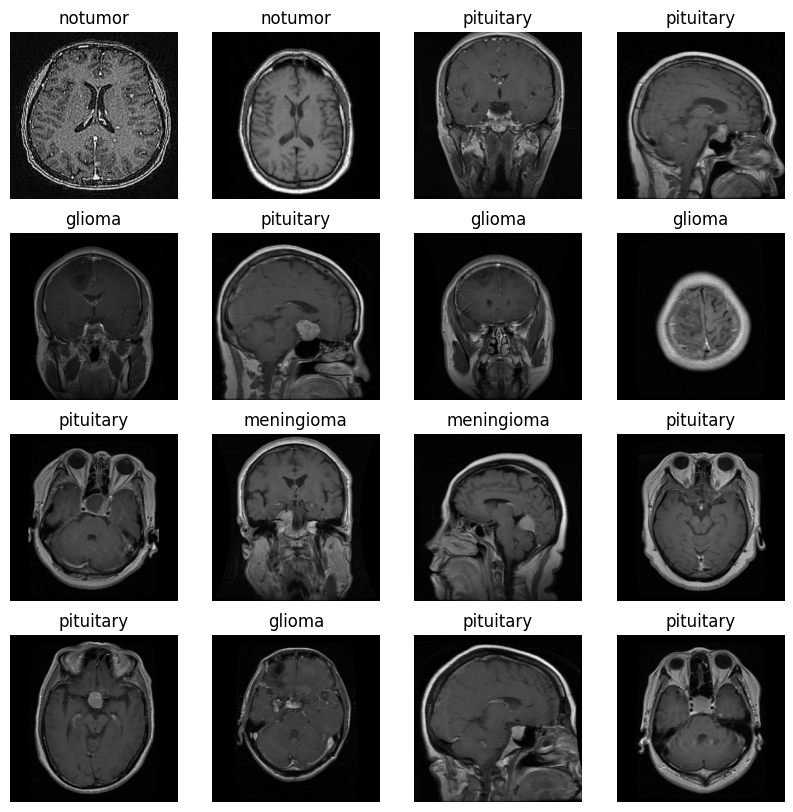

In [5]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in data.take(1) : 
    for i in range(16):
        ax = plt.subplot(4 ,4 , i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(classes[label_batch[i]])


### Finding images to be scaled in 0 to 255.0

In [6]:
for image_batch , label_batch in data.take(1):
    for i in range(1):
        print(np.max(image_batch[i]) , np.min(image_batch[i]))

255.0 0.0


In [7]:
def get_dataset_partitions(ds , train_split = 0.8 , val_split = 0.1 , test_split = 0.1 , shuffle = True , shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle : 
        ds = ds.shuffle(shuffle_size , seed = 97)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds , val_ds , test_ds

In [8]:
train , test , val = get_dataset_partitions(data)
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [9]:
model = models.Sequential([
    #preprocessing
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),

    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

    #cnn
    layers.Conv2D(128 , kernel_size = (2,2) , activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((4,4)),
    layers.Conv2D(64 , kernel_size = (2 , 2) , activation = 'relu'),
    layers.MaxPooling2D((4,4)),
    layers.Conv2D(32 , kernel_size = (2 , 2) , activation = 'relu'),
    layers.MaxPooling2D((4,4)),
    
    layers.Flatten(),
    layers.Dense(128 , activation = 'relu'),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(16 , activation = 'relu'),
    layers.Dense(n_classes , activation = 'softmax'),
])

model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

model.build(input_shape=input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (32, 256, 256, 3)         0         
                                                                 
 rescaling (Rescaling)       (32, 256, 256, 3)         0         
                                                                 
 random_flip (RandomFlip)    (32, 256, 256, 3)         0         
                                                                 
 random_rotation (RandomRot  (32, 256, 256, 3)         0         
 ation)                                                          
                                                                 
 conv2d (Conv2D)             (32, 255, 255, 128)       1664      
                                                                 
 max_pooling2d (MaxPooling2  (32, 63, 63, 128)         0         
 D)                                                     

In [10]:
history = model.fit(
    train ,
    epochs = EPOCHS ,
    batch_size = BATCH_SIZE , 
    validation_data = val
)


Epoch 1/50


176/176 [==============================] - 316s 2s/step - loss: 1.0581 - accuracy: 0.5256 - val_loss: 0.7209 - val_accuracy: 0.7273
Epoch 2/50
176/176 [==============================] - 235s 1s/step - loss: 0.7521 - accuracy: 0.6969 - val_loss: 0.6955 - val_accuracy: 0.7188
Epoch 3/50
176/176 [==============================] - 211s 1s/step - loss: 0.6673 - accuracy: 0.7370 - val_loss: 0.5816 - val_accuracy: 0.7685
Epoch 4/50
176/176 [==============================] - 216s 1s/step - loss: 0.6206 - accuracy: 0.7516 - val_loss: 0.8044 - val_accuracy: 0.6477
Epoch 5/50
176/176 [==============================] - 218s 1s/step - loss: 0.5736 - accuracy: 0.7710 - val_loss: 0.5983 - val_accuracy: 0.7472
Epoch 6/50
176/176 [==============================] - 278s 2s/step - loss: 0.5439 - accuracy: 0.7860 - val_loss: 0.4970 - val_accuracy: 0.7940
Epoch 7/50
176/176 [==============================] - 371s 2s/step - loss: 0.5143 - accuracy: 0.7971 - val_loss: 0.4526 - val_accuracy: 0.8054
Epoch 8/50

INFO:tensorflow:Assets written to: train1.model\assets


In [36]:
model.save("train1.model")

INFO:tensorflow:Assets written to: train1.model\assets


INFO:tensorflow:Assets written to: train1.model\assets


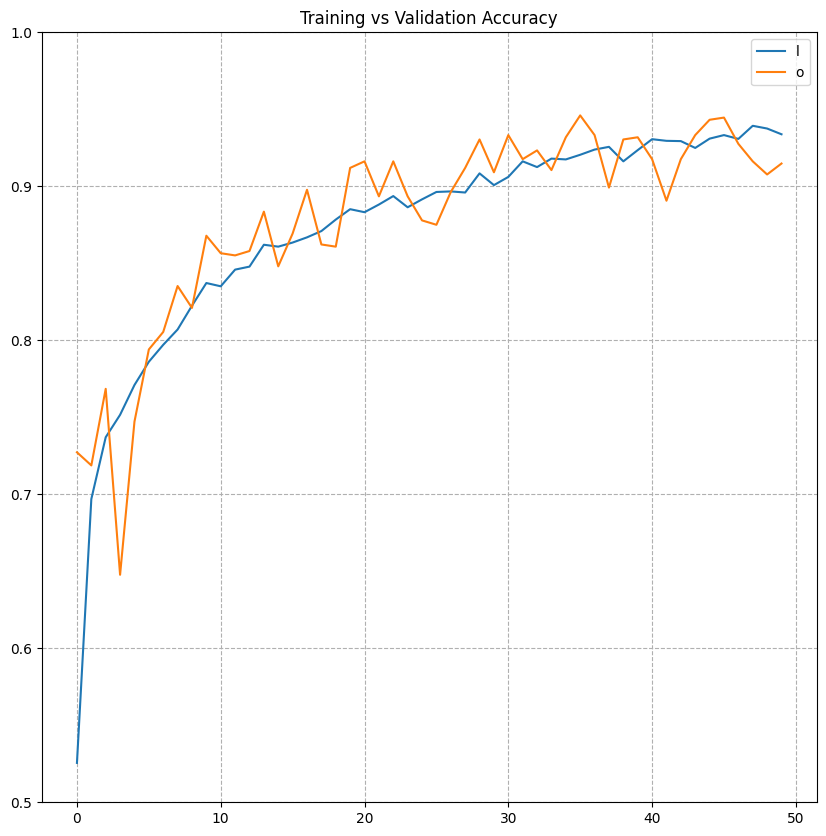

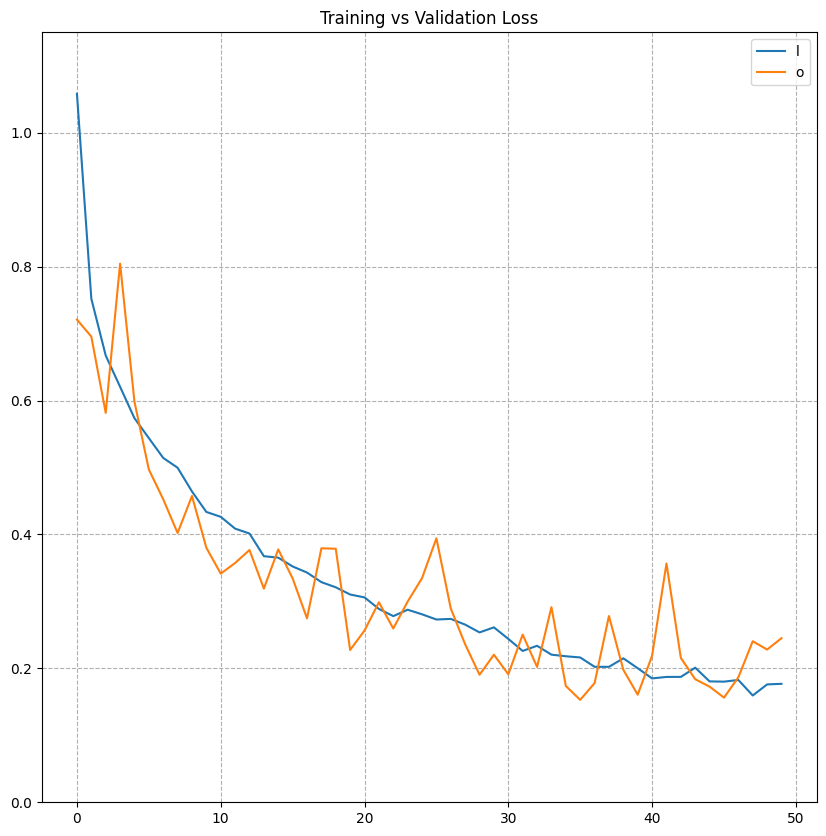

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
plt.title("Training vs Validation Accuracy")
plt.plot(range(EPOCHS) , acc , label = "Training Accuracy")
plt.plot(range(EPOCHS) , val_acc , label = "Validation Accuracy")
plt.legend('lower right')
plt.grid(linestyle = "--" )
plt.ylim(0.5,1)
plt.savefig("history/Accuracy.png")

plt.figure(figsize=(10,10))
# plt.subplot(1,2,2)
plt.title("Training vs Validation Loss")
plt.plot(range(EPOCHS) , loss , label = "Training loss")
plt.plot(range(EPOCHS) , val_loss , label = "Validation loss")
plt.legend('lower right')
plt.grid(linestyle = "--" )
plt.ylim(0,1.15)
plt.savefig("history/Loss.png")
plt.show()


In [34]:
model.evaluate(test)

22/22 [==============================] - 6s 263ms/step - loss: 0.2459 - accuracy: 0.9205


[0.2459462732076645, 0.9204545617103577]

In [37]:
acc = np.array(acc)
np.save("history/acc.npy" , acc)
val_acc = np.array(val_acc)
np.save("history/val_acc.npy" , val_acc)
loss = np.array(loss)
np.save("history/loss.npy" , loss)
val_loss = np.array(acc)
np.save("history/val_loss.npy" , val_loss)

In [38]:
pretrained_model = keras.models.load_model("train1.model")

In [41]:
pretrained_model.evaluate(val)

22/22 [==============================] - 7s 298ms/step - loss: 0.2451 - accuracy: 0.9148


[0.24508142471313477, 0.9147727489471436]

In [40]:
pretrained_model.evaluate(train)

176/176 [==============================] - 64s 367ms/step - loss: 0.2427 - accuracy: 0.9087


[0.2427048236131668, 0.9087358117103577]

In [43]:
pretrained_model.evaluate(test)

22/22 [==============================] - 6s 253ms/step - loss: 0.2459 - accuracy: 0.9205


[0.2459462583065033, 0.9204545617103577]

In [94]:
def predict(model , image , class_names):
    image = np.resize(np.array(Image.open(image)) , (256,256,3))
    
    image = tf.expand_dims(image,0)
    predictions = model.predict(image)
    cls = class_names[np.argmax(predictions[0])]
    confidence = np.round(np.argmax(predictions[0]) , 2)
    return cls , confidence ,predictions

In [103]:
def predict_tf(model, img , classes):
    # print(img.shape)
    img_array = np.array(img)
    # print(img_array.shape)
    img_array = tf.expand_dims(img_array,0)
    # print(img_array.shape)
    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [48]:
plt.figure(figsize=(5,5))


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 61ms/step


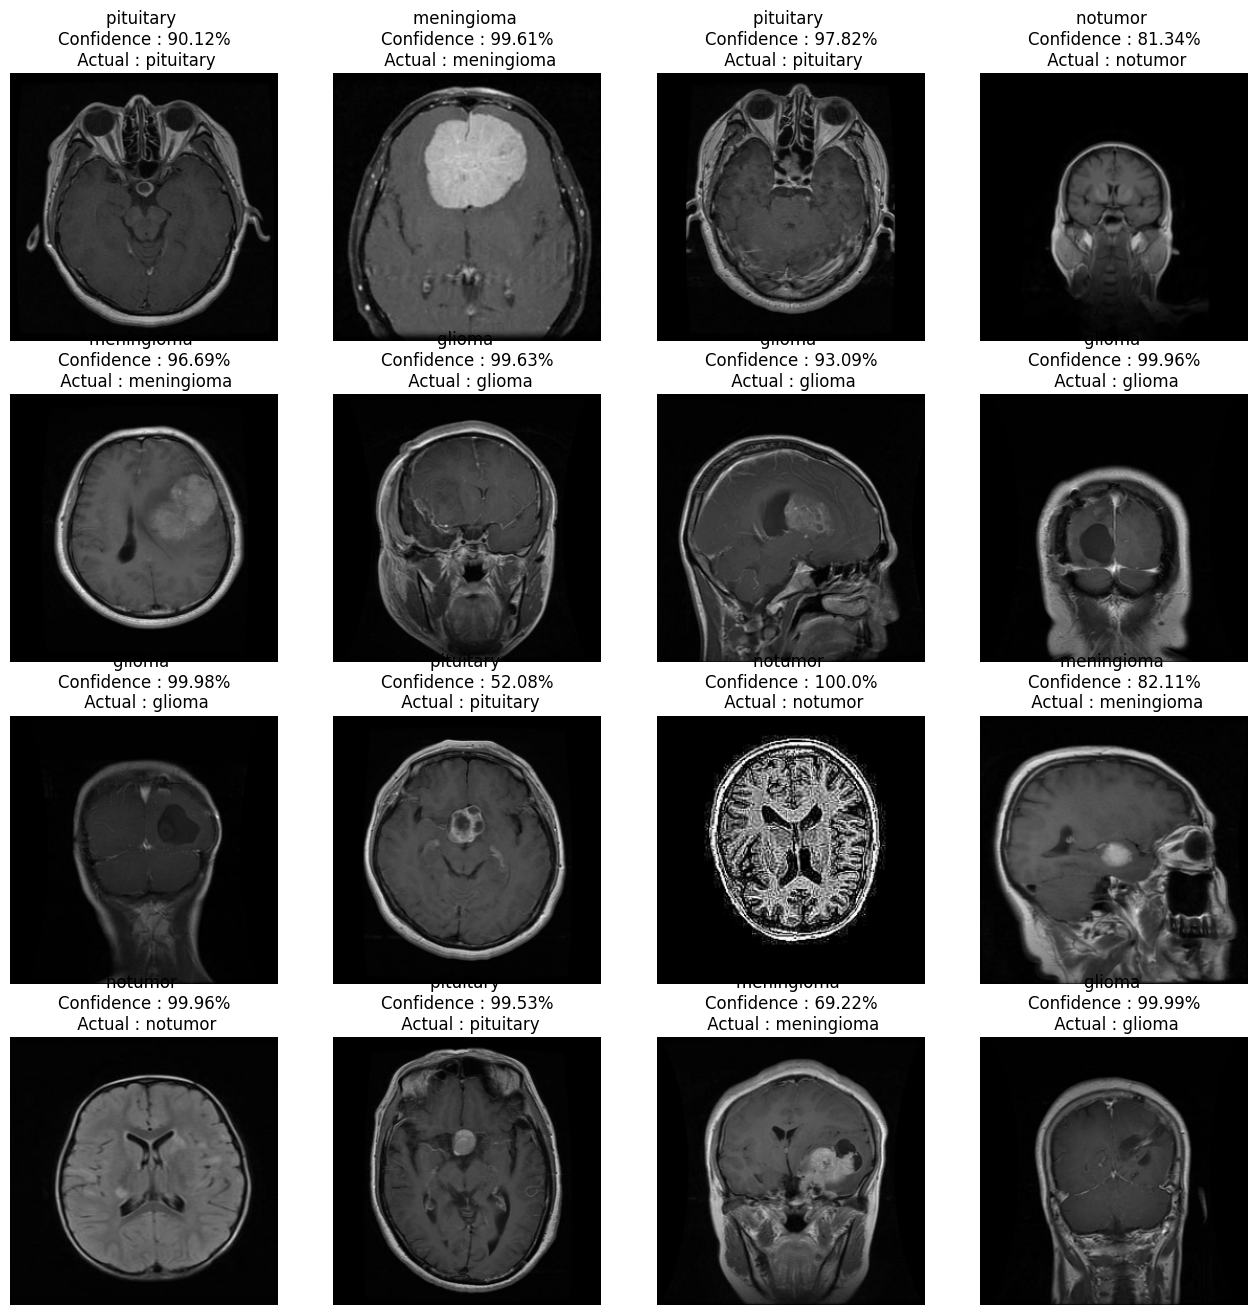

In [133]:
plt.figure(figsize=(16,16))
for images , labels in train.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(images[i]/255.0)
        plt.axis("off") 
        plt.title(predict_tf(pretrained_model , images[i] , classes)[0] + " \nConfidence : " + str(predict_tf(pretrained_model , images[i] , classes)[1]) + "%\n Actual : " + classes[labels[i]])